In [1]:
from time import time
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
print(tf.__version__)

2.4.0


# ***load dataset***

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


# ***CNN*** ***Model***

In [3]:
ac="elu"

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation=ac, input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation=ac, input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=ac),
  tf.keras.layers.Dense(256, activation=ac),
  tf.keras.layers.Dense(10, activation='softmax')
])

# ***adam***

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ***rmsprop***

In [5]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6

# ***CALLBACK***

In [6]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()


# ***Train***

In [7]:
t1=time()
history = model.fit(training_images, training_labels, epochs= 15 ,callbacks=[callbacks])
t2=time()

print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)


Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5777 - accuracy: 0.7899
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3162 - accuracy: 0.8832
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9002
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9130
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2026 - accuracy: 0.9255
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1794 - accuracy: 0.9341
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1606 - accuracy: 0.9412
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1413 - accuracy: 0.9484
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9541

Reached 95.00% accuracy, so stopping training!!

Training wall clock time: 53.10

# ***Plot***

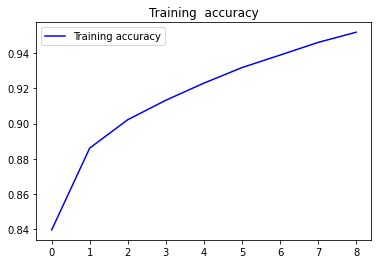

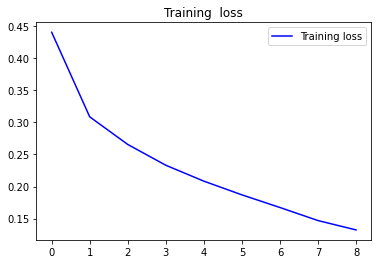

In [8]:
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training  loss')
plt.legend()
plt.show()